/home/winter/onsager/tsqm/dynamics/56tnvt4/run0001_dihedrals.dat
Hopping occurred at frame: 20158


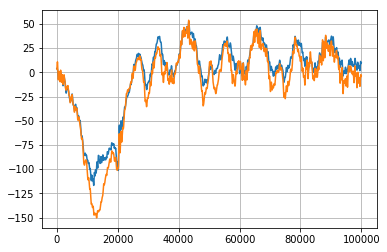

/home/winter/onsager/tsqm/dynamics/56tnvt4/run0002_dihedrals.dat
Hopping occurred at frame: 100000


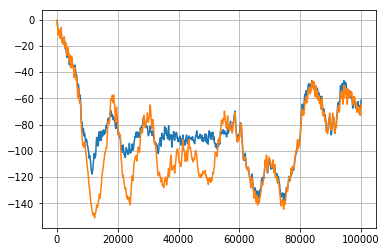

/home/winter/onsager/tsqm/dynamics/56tnvt4/run0003_dihedrals.dat
Hopping occurred at frame: 22075


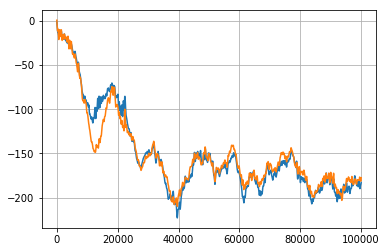

/home/winter/onsager/tsqm/dynamics/56tnvt4/run0004_dihedrals.dat
Hopping occurred at frame: 19422


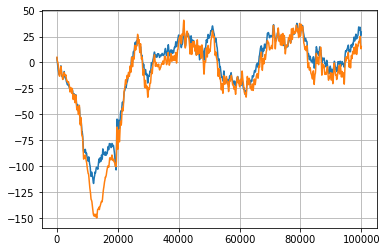

/home/winter/onsager/tsqm/dynamics/56tnvt4/run0005_dihedrals.dat
Hopping occurred at frame: 20266


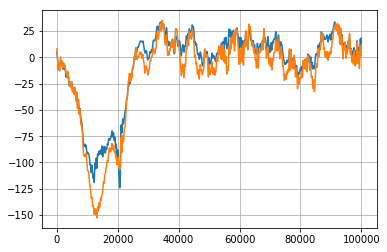

/home/winter/onsager/tsqm/dynamics/56tnvt4/run0006_dihedrals.dat
Hopping occurred at frame: 100000


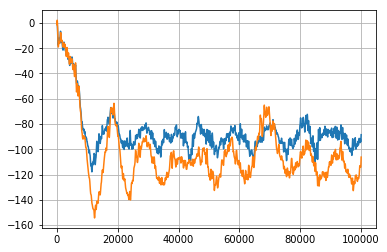

/home/winter/onsager/tsqm/dynamics/56tnvt4/run0007_dihedrals.dat
Hopping occurred at frame: 100000


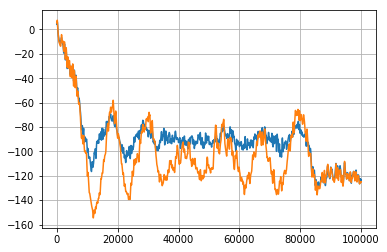

/home/winter/onsager/tsqm/dynamics/56tnvt4/run0008_dihedrals.dat
Hopping occurred at frame: 70964


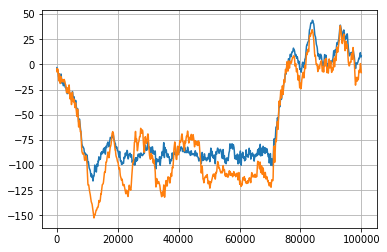

/home/winter/onsager/tsqm/dynamics/56tnvt4/run0009_dihedrals.dat
Hopping occurred at frame: 100000


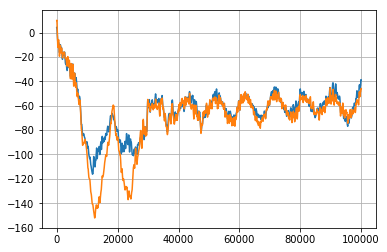

/home/winter/onsager/tsqm/dynamics/56tnvt4/run0010_dihedrals.dat
Hopping occurred at frame: 20819


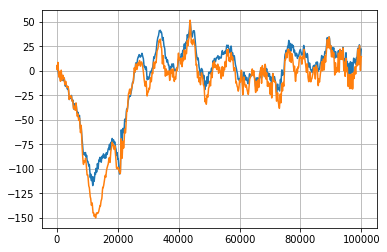

/home/winter/onsager/tsqm/dynamics/56tnvt4/run0011_dihedrals.dat
Hopping occurred at frame: 93472


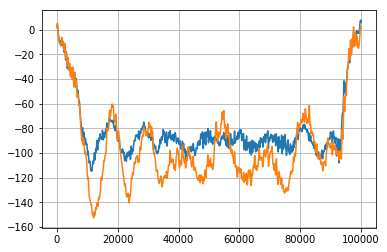

/home/winter/onsager/tsqm/dynamics/56tnvt4/run0012_dihedrals.dat
Hopping occurred at frame: 100000


KeyboardInterrupt: 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import glob

%matplotlib inline

name='56tnvt4'
style1='bwr'
style2='coolwarm'
dotsize =0.1

for filename in sorted(glob.iglob("/home/winter/onsager/tsqm/dynamics/%s/run*_dihedrals.dat" %name)):
    print(filename)
    hopfilename = filename[0:-14] + ".hopframe"
    hopframe = int(np.genfromtxt(hopfilename, skip_header=0, skip_footer=0, usecols=0))
    print("Hopping occurred at frame:", hopframe)
    rdih = np.genfromtxt(filename, skip_header=0, skip_footer=0, usecols=0)
    pyr = np.genfromtxt(filename, skip_header=0, skip_footer=0, usecols=1)
    rot = np.genfromtxt(filename, skip_header=0, skip_footer=0, usecols=2)
    sta = np.genfromtxt(filename, skip_header=0, skip_footer=0, usecols=3)
    rdum = np.genfromtxt(filename, skip_header=0, skip_footer=0, usecols=4)
    # Phase unwrapping. Note that if input data is too bad, i.e. too much oscillation between like -179 and 179, phase unwrapping would fail
    dih = np.copy(rdih)
    for i in range(1,rdih.size):
        diff=dih[i]-dih[i-1]
        if diff > 180:
            dih[i:] -= 360
        elif diff < -180:
            dih[i:] += 360
    
    dum = np.copy(rdum)
    for i in range(1,rdum.size):
        diff=dum[i]-dum[i-1]
        if diff > 180:
            dum[i:] -= 360
        elif diff < -180:
            dum[i:] += 360
            
    dih1=dih[0:hopframe]
    pyr1=pyr[0:hopframe]
    rot1=rot[0:hopframe]
    sta1=sta[0:hopframe]
    dih2=dih[hopframe:-1]
    pyr2=pyr[hopframe:-1]
    rot2=rot[hopframe:-1]
    sta2=sta[hopframe:-1]
    dih3=dih[-1000:-1]
    pyr3=pyr[-1000:-1]
    rot3=rot[-1000:-1]
    sta3=sta[-1000:-1] 
    
    #plt.plot(idum)
    #plt.plot(rdum)
    plt.plot(dum-90)
    plt.plot(dih)
    plt.grid(True)
    plt.show()
    

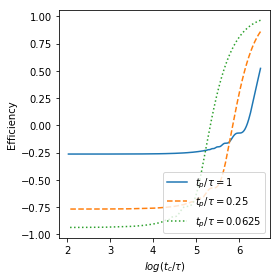

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

f = np.linspace(-6.5,-2.03,1000)
fig2, ax = plt.subplots(figsize=(4,4))

g = 1./1
y=0
for n in range(1, 1000000):
    term = np.power(np.sin(n*np.pi/g*np.power(10,f)),2) / (1+4*np.pi*np.pi*n*n*np.power(10,2*f))
    y = y+term
y = 16*np.power(10,f)*g*y
ax.plot(-f,1-y,label="$t_p/\\tau =1$")

g = 1./0.25
y=0
for n in range(1, 1000000):
    term = np.power(np.sin(n*np.pi/g*np.power(10,f)),2) / (1+4*np.pi*np.pi*n*n*np.power(10,2*f))
    y = y+term
y = 16*np.power(10,f)*g*y
ax.plot(-f,1-y,label="$t_p/\\tau =0.25$",linestyle='--')

g = 1./0.0625
y=0
for n in range(1, 1000000):
    term = np.power(np.sin(n*np.pi/g*np.power(10,f)),2) / (1+4*np.pi*np.pi*n*n*np.power(10,2*f))
    y = y+term
y = 16*np.power(10,f)*g*y
ax.plot(-f,1-y,label="$t_p/\\tau =0.0625$",linestyle=':')

ax.set_xlabel("$log(t_c/\\tau)$")
ax.set_ylabel("Efficiency")
ax.legend(loc='lower right')

plt.tight_layout()
fig2.savefig('Fig2.pdf',format='pdf', dpi=2400)

In [7]:
%%timeit

df = pd.read_csv('/home/winter/onsager/tsqm/dynamics/fullbefore.molden', header=None, delim_whitespace=True, skiprows = 53, skip_blank_lines=False, names=['atom','x','y', 'z']) #Skip the ATOM section which is useless
nframe = df.shape[0] // 50 + 1

# Vectorized calculation on coordinates of the dummy atom, which should be perpendicular to 1-14-13 plane
r1 = df.iloc[0:0+50*nframe:50,1:].values.astype(float)
r13 = df.iloc[12:12+50*nframe:50,1:].values.astype(float)
r14 = df.iloc[13:13+50*nframe:50,1:].values.astype(float)
nvec = np.cross((r1-r14),(r13-r14)) 
nvec = nvec / np.linalg.norm(nvec)
rdummy = r14 + nvec
# Replace sulfur atom by dummy atom.
df.iloc[6:6+50*nframe:50,0] = 'XX'
df.iloc[6:6+50*nframe:50,1:] = rdummy
    
df.to_csv('/home/winter/onsager/tsqm/dynamics/pd.molden', header=None, index=None, sep='\t')

23.7 s ± 580 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
df

NameError: name 'df' is not defined